In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
import matplotlib
df = pd.read_csv('lp_milp.csv')
nRxns=[45,111,283,1263]
df.head()
import seaborn as sns

<ipython-input-7-f4865ca35817>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontweight='bold',fontsize=10)


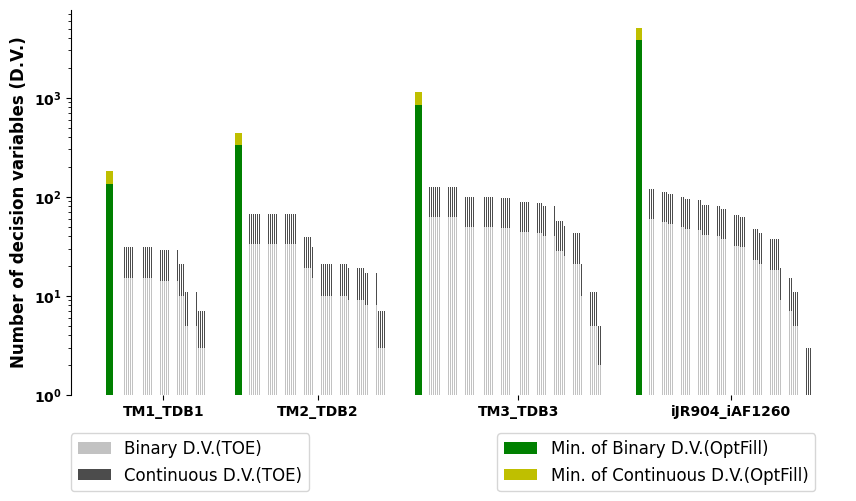

In [ ]:
df1 = df[(df['tp']=='b1') | (df['tp']=='c1')]
df2 = df[(df['tp']=='b2') | (df['tp']=='c2')]
df3 = df[(df['tp']=='b3') | (df['tp']=='c3')]
df4 = df[(df['tp']=='b4') | (df['tp']=='c4')]
dfs=[df1,df2,df3,df4]
fig,ax=plt.subplots(1,1,figsize=(10,5))
k=0
ks=[]
for i in range(4):
  d = dfs[i]
  bt=d['count'][d['tp']=='b'+str(1+i)]
  cp= d['count'][d['tp']=='c'+str(1+i)]
  if i<3:
    plt.bar(np.arange(0,len(bt))+k, bt, width=0.3,color='darkgray',linewidth=1,alpha=0.7)
    plt.bar(np.arange(0,len(bt))+k, cp, width=0.3,bottom=bt, color='black',linewidth=1,alpha=0.7)
    plt.bar(k-5, nRxns[i]*3, width=3, color='g')
    plt.bar(k-5, nRxns[i], width=3,bottom=nRxns[i]*3, color='y')
  else:
    plt.bar(np.arange(0,len(bt))+k, bt, width=0.3,color='darkgray',linewidth=1,alpha=0.7,label='Binary D.V.(TOE)')
    plt.bar(np.arange(0,len(bt))+k, cp, width=0.3,bottom=bt, color='black',linewidth=1,alpha=0.7,label='Continuous D.V.(TOE)')
    plt.bar(k-5, nRxns[i]*3, width=3, color='g',label='Min. of Binary D.V.(OptFill)')
    plt.bar(k-5, nRxns[i], width=3,bottom=nRxns[i]*3, color='y',label='Min. of Continuous D.V.(OptFill)')

  ks.append((2*k+len(bt))/2)
  k=k+len(bt)+20
ax.set_yscale('log')
ax.set_ylabel("Number of decision variables (D.V.)",fontweight='bold',fontsize=12)
ax.set_xticks(np.array(ks))
ax.set_xticklabels(('TM1_TDB1', 'TM2_TDB2', 'TM3_TDB3','iJR904_iAF1260'),fontweight='bold',fontsize=10);
ax.set_yticklabels(ax.get_yticklabels(),fontweight='bold',fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)


handles1, labels1 = ax.get_legend_handles_labels()

# Filter entries for  legend
handles2 = [handles1[i] for i,label in enumerate(labels1) if 'TOE' in label]
labels2 = [label for label in labels1 if 'TOE' in label]

# Filter entries for  legend
handles0 = [handles1[i] for i,label in enumerate(labels1) if 'OptFill' in label]
labels0 = [label for label in labels1 if 'OptFill' in label]

# Create second legend (below x-axis)
tp = plt.legend(handles0, labels0, loc=(0.55, -0.25),prop={'size':12})
plt.legend(handles2, labels2, loc=(0, -0.25),prop={'size':12})

plt.gca().add_artist(tp)
plt.savefig('TOE.pdf',bbox_inches='tight')